Student No. R00224406
Name: Vaishnavi Udanshiv

IMPORTING THE NECESSARY LIBRARIES

In [1]:
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracyuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
random.seed(406)   #setting random seed for reproducibilty

Loading Dataset

In [4]:
v_data_dir = 'enron1'  #fetching the location of data and storing it into v_data_dir variable
v_spam_dir = os.path.join(v_data_dir, 'spam')  #location for spam mails
v_ham_dir = os.path.join(v_data_dir, 'ham')   #location  for ham mails
v_spam_emails = []      #spam email contents gets stored as a string in this list
for new_file in os.listdir(v_spam_dir):      #looping over all the files in spam directory
    with open(os.path.join(v_spam_dir, new_file), 'r', encoding='latin-1') as f:        #open function to read file with encoding specification
        v_spam_emails.append(f.read())      #list is being created for spam mails
 = []           #ham email contents gets stored as a string in this list
for new_file in os.listdir(v_ham_dir):  #loopin over all the files in ham directory
    with open(os.path.join(v_ham_dir, new_file), 'r', encoding='latin-1') as f:           #open function to read file with encoding specification
        v_ham_emails.append(f.read())             #list is being created for ham mailsv_ham_emails

Data Pre-processing

In [5]:
v_spam_emails = list(set(v_spam_emails))   #converting into set to Remove any duplicates
v_ham_emails = list(set(v_ham_emails))       #and converting back to list

v_spam_emails = [email for email in v_spam_emails if email.strip() != '']       #removing empty emails if any
v_ham_emails = [email for email in v_ham_emails if email.strip() != '']        #checking with the help of strip function by looping over lists

v_spam_labels = np.ones(len(v_spam_emails))          # Creating label as 1 for spam emails
v_ham_labels = np.zeros(len(v_ham_emails))           #creating label as 0 for ham emails

emails = v_spam_emails + v_ham_emails              #concatenating lists of emails
labels = np.concatenate([v_spam_labels, v_ham_labels])      #concatenaing labels in single array


Splitting

In [13]:
x_train, x_test, y_train, y_test = train_test_split(emails, labels, test_size=0.3, random_state=406) # Splitting the data into training and test sets

train_spam_count = sum(y_train == 1)          #counting number of spam emails in training set
train_ham_count = sum(y_train == 0)           #counting number of ham emails in training set
test_spam_count = sum(y_test == 1)            #counting number of ham emails in testing set
test_ham_count = sum(y_test == 0)             #counting number of ham emails in testing set


print(f'Training set: {len(x_train)} emails ({train_spam_count} spam, {train_ham_count} ham)')      #printing total and individual count for spam and ham emails in training set 
print(f'Test set: {len(x_test)} emails ({test_spam_count} spam, {test_ham_count} ham)')       #printing total and individual count for spam and ham emails in testing set 

np.savez_compressed('final_train.npz', x_train=x_train, y_train=y_train)     #storing training set in a compressed file
np.savez_compressed('final_test.npz', xX_test=x_test, y_test=y_test)     #storing testing set in a compressed file


Training set: 3495 emails (1027 spam, 2468 ham)
Test set: 1499 emails (436 spam, 1063 ham)


Feature Extraction

In [16]:
train_data = np.load('final_train.npz')  # Loading the training data
x_train = train_data['x_train']   #loading emails
y_train = train_data['y_train']    #loading labels

newVectorizer = CountVectorizer(stop_words='english', max_features=5000)  #creating baf of word representation
x_train_bag = newVectorizer.fit_transform(x_train)    #fitting it to training data and transforming to a matrix
print(f'Shape of x_train_bag_of_words: {x_train_bag.shape}')     #printing shape of the resulting matrix


Shape of x_train_bag_of_words: (3495, 5000)


Exploratory Data Analysis

c:\Users\vaish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


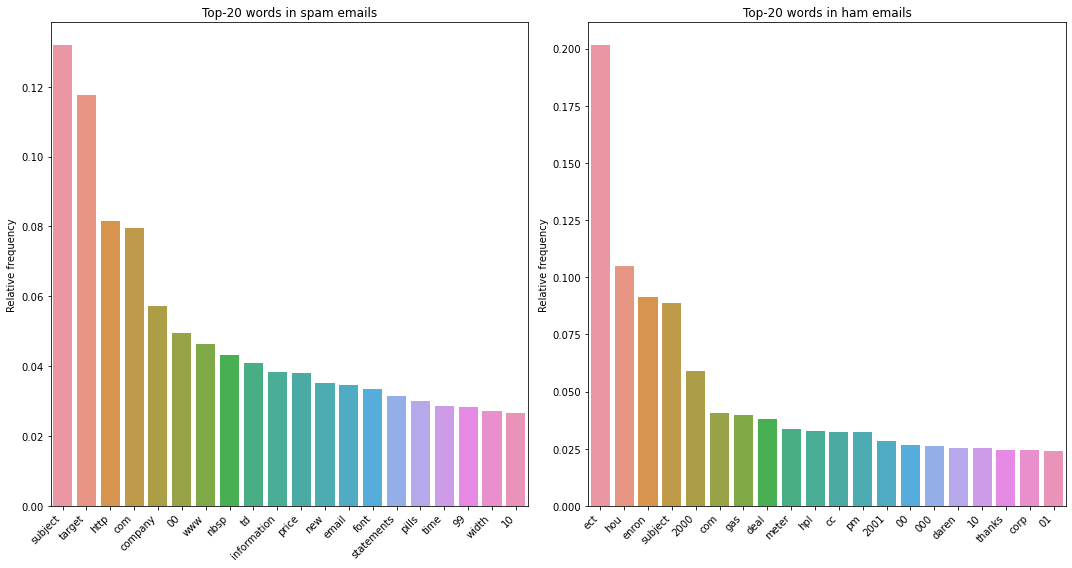

In [26]:
x_train_dataFrame = pd.DataFrame.sparse.from_spmatrix(x_train_bag, columns=newVectorizer.get_feature_names())  # Converting sparse matrix to the DataFrame

x_train_dataFrame['target'] = y_train   # Adding target variable to the DataFrame

spam_top_20 = x_train_dataFrame[x_train_dataFrame['target'] == 1].iloc[:,:-1].sum().sort_values(ascending=False)[:20]  # top-20 most frequent words in spam emails

ham_top_20 = x_train_dataFrame[x_train_dataFrame['target'] == 0].iloc[:,:-1].sum().sort_values(ascending=False)[:20]   # top-20 most frequent words in ham emails

# Plotting the  relative frequencies
fig, axis = plt.subplots(ncols=2, figsize=(15, 8))   #structure of plot
sns.barplot(x=spam_top_20.index, y=spam_top_20 / spam_top_20.sum(), ax=axis[0])   #plot for top-20 words in spam emails
sns.barplot(x=ham_top_20.index, y=ham_top_20 / ham_top_20.sum(), ax=axis[1])     #plot for top-20 words in ham emails
axis[0].set_title('Top-20 words in spam emails')   #title for spam emails
axis[1].set_title('Top-20 words in ham emails')     #title for ham emails 
axis[0].set_ylabel('Relative frequency')     #y-axis label for spam
axis[1].set_ylabel('Relative frequency')      #y-axis label for ham
axis[0].set_xticklabels(axis[0].get_xticklabels(), rotation=45, ha='right')  #customizing plots
axis[1].set_xticklabels(axis[1].get_xticklabels(), rotation=45, ha='right')   #customizing plots
plt.tight_layout()    #to adjust spacing between subplots
plt.show()   #display plot


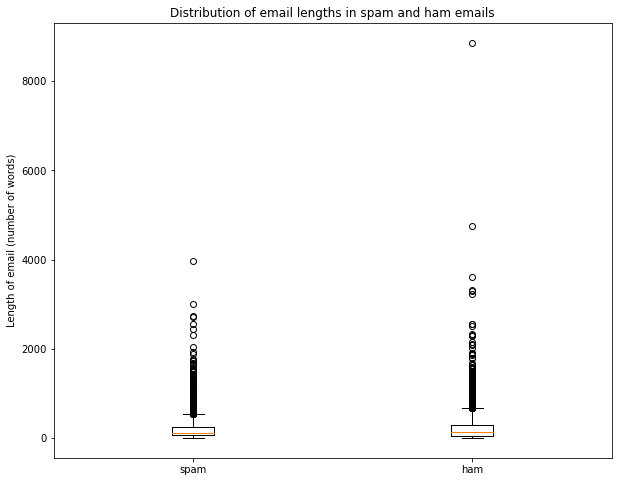

In [30]:
spam_lengths = [len(email.split()) for email in v_spam_emails] # Calculating the length of each email in spam
ham_lengths = [len(email.split()) for email in v_ham_emails]   # Calculating the length of each email in ham

# Creating Box plot of email lengths for spam and ham emails
fig, ax = plt.subplots(figsize=(10, 8))  #structure of the boxplot
ax.boxplot([spam_lengths, ham_lengths])   #plotting email lengths
ax.set_xticklabels(['spam', 'ham'])    #x-label
ax.set_ylabel('Length of email (number of words)')     #y-label
ax.set_title('Distribution of email lengths in spam and ham emails')    #title for the plot
plt.show()  #display


Supervised Classification

In [33]:
# Training a Multinomial Naive Bayes classifier
model = MultinomialNB().fit(x_train_bag, y_train)   #fitted bag of words representation on training data

# Evaluating the model on the test set
x_test_bag = newVectorizer.transform(x_test)   #bag of words representation of test set
y_pred = model.predict(x_test_bag)    #predict method to generate predicitons for the test set
accuracy = accuracy_score(y_test, y_pred)   #calculating accuracy score on test set

# Printing the confusion matrix
print("Accuracy:", accuracy)   # Printing the accuracy
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))  # Printing the confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))   # Printing the classification report


Accuracy: 0.9606404269513009
Confusion Matrix:
[[1028   35]
 [  24  412]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1063
         1.0       0.92      0.94      0.93       436

    accuracy                           0.96      1499
   macro avg       0.95      0.96      0.95      1499
weighted avg       0.96      0.96      0.96      1499



In [34]:
# Saving the model to disk
with open('email_classifier.pkl', 'wb') as f:
    pickle.dump(model, f)

Model Selection

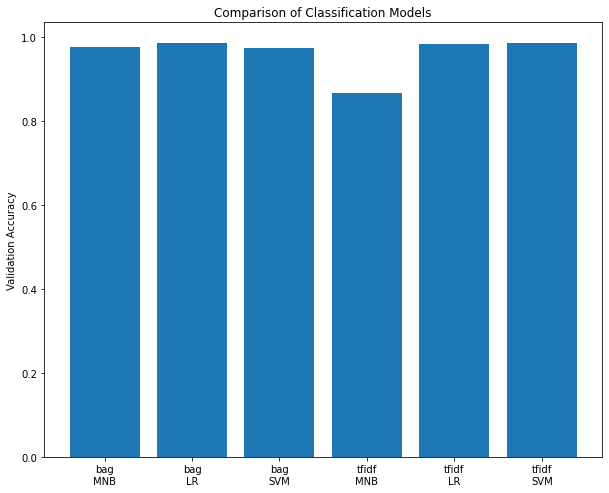

Best model: tfidf + SVM (0.9860 accuracy)
Test accuracy: 0.9860


In [40]:
# Creating a vectorizers_list for bag-of-words and tf-idf representations
vectorizers_list = [
    ('bag', CountVectorizer()),     #bag of words
    ('tfidf', TfidfVectorizer())    #tf-idf
]

# Creating classifiers_list to compare
classifiers_list = [
    ('MNB', MultinomialNB()),    #Multinomial Naive Bayes
    ('LR', LogisticRegression(max_iter=10000)),     #LogisticRegression
    ('SVM', SVC(kernel='linear', probability=True))     #SupportVectorMchine
]

# Looping over vectorizers_list and classifiers_list to compare all possible combinations
final_results = []     
for vect_name, vectorizer in vectorizers_list:       #looping over vectorizers_list
    x_train_vector = vectorizer.fit_transform(x_train)    #vectorizer used on training set
    x_test_vector = vectorizer.transform(x_test)            #vectorizer used on testing set
    for class_name, classifier in classifiers_list:       #looping through classifiers_list
        classifier.fit(x_train_vector, y_train)           #fitted on training set
        y_pred = classifier.predict(x_test_vector)        #predicting on testing set
        accuracy = accuracy_score(y_test, y_pred)         #calculating accuracy
        final_results.append((vect_name, class_name, accuracy))        #appending in the empty list

# Creating a bar plot to compare accuracy of all models
fig, ax = plt.subplots(figsize=(10, 8))      #structure of the plot
ax.bar([f'{vector}\n{classi}' for vector, classi, _ in final_results], [accuracy for _, _, accuracy in final_results])   #variables for plot 
ax.set_title('Comparison of different Classification Models')   #title
ax.set_ylabel('Accuracy on test set')   #y-label
plt.show()   #display

best_vect_name, best_class_name, best_accuracy = max(final_results, key=lambda x: x[2])   #finding model with the highest accuracy
print(f'Best model: {best_vect_name} + {best_class_name} ({best_accuracy:.4f} accuracy)')    #printing best vectorizer and classifier

# Training the best model on the entire training set
best_vectorizer = next(vector for vect_name, vector in vectorizers_list if vect_name == best_vect_name)   #using next function to assign
#first vector object in vectorizers_list whose vect_name is equal to best_vect_name
x_train_vector = best_vectorizer.fit_transform(x_train)  #fitting training data on best vector
x_test_vector = best_vectorizer.transform(x_test)   #fitting testing data on best vector
best_classifier = next(classi for class_name, classi in classifiers_list if class_name == best_class_name)  #similarly taking the best classifier 
best_classifier.fit(x_train_vector, y_train)   #fitting training data
y_pred = best_classifier.predict(x_test_vector)    #predicting outcome on testing set
test_accuracy = accuracy_score(y_test, y_pred)     #evaluating accuracy
print(f'Test accuracy: {test_accuracy:.4f}')     #printing accuracy




In [ ]:
with open('best_model.pkl', 'wb') as f:    #saving it to the disk
    pickle.dump((best_vectorizer, best_classifier), f)

Model Evaluation

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1063
         1.0       0.97      0.98      0.98       436

    accuracy                           0.99      1499
   macro avg       0.98      0.98      0.98      1499
weighted avg       0.99      0.99      0.99      1499

[[1052   11]
 [  10  426]]


c:\Users\vaish\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


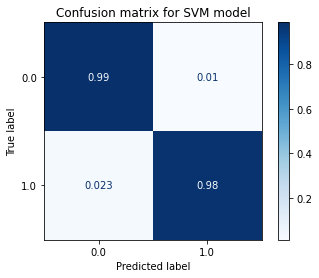

In [42]:
print(classification_report(y_test, y_pred))   #printing classification report for the best model
print(confusion_matrix(y_test, y_pred))
plot_confusion_matrix(best_classifier, X_test_vect, y_test, cmap=plt.cm.Blues, normalize='true')   #plotting confusion matrix
plt.title("Confusion matrix for SVM model")   #title for confusion matrix
plt.show()   #display